# Linear Regression

<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

![Linear Regression](../data/linear_regression.png)

![ML System](../data/ML_System.png)



https://github.com/42-AI/bootcamp_machine-learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, widgets

# %matplotlib notebook
# %matplotlib widget
%matplotlib inline


MIN_VALUE = 0
MAX_VALUE = 1
NB_ELEMENTS = 100

x = np.linspace(MIN_VALUE, MAX_VALUE, NB_ELEMENTS)
COEF_A_MIN = 0
COEF_A_MAX = 5

COEF_B_MIN = 0
COEF_B_MAX = 5

COEF_DELTA_A = (COEF_A_MAX) - (COEF_A_MIN)
COEF_DELTA_B = (COEF_B_MAX) - (COEF_B_MIN)

COEF_A = (random.random() * (COEF_DELTA_A - 1)) + COEF_A_MIN + .5
COEF_B = (random.random() * (COEF_DELTA_B - 1)) + COEF_B_MIN + .5
random_noise = np.random.random(NB_ELEMENTS) * MAX_VALUE * 2
random_noise -= random_noise.mean()
# y = (a * x) + b
# plt.scatter(x, y)
y = (COEF_A * x) + COEF_B + random_noise

print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{COEF_A = }")
print(f"{COEF_B = }")

x.shape = (100,)
y.shape = (100,)
COEF_A = 1.1951631635652498
COEF_B = 1.3677834296725182


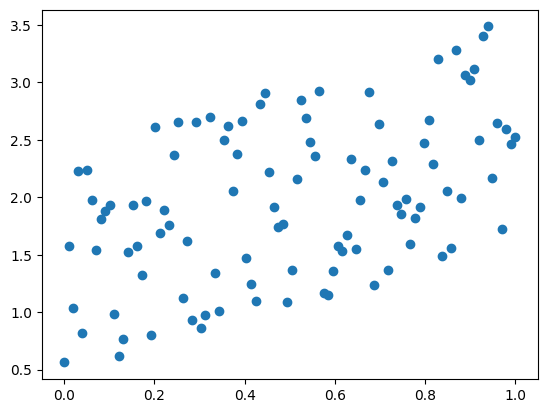

In [2]:
plt.scatter(x, y)

# Data

$m$ is the number of examples

$n$ is the number of dimensions / features

# X can have multiple features

$$
X^{(m)}_n
$$

# Y only has one dimension

$$
Y^{(m)}
$$

In [3]:
def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()

In [4]:
costs = []
for a in np.linspace(COEF_A_MIN, COEF_A_MAX, 50):
    for b in np.linspace(COEF_B_MIN, COEF_B_MAX, 50):
        thetas = np.array((a, b))
        cost = get_cost(y, predict(x, thetas))
        costs.append((a, b, cost))

MIN_COST = min(costs, key=lambda x: x[2])[2]
MAX_COST = max(costs, key=lambda x: x[2])[2]
print(f"{MIN_COST = }")
print(f"{MAX_COST = }")

WORST_A_PARAM = max(costs, key=lambda x: x[0])[0]
WORST_B_PARAM = max(costs, key=lambda x: x[1])[1]

MIN_COST = 36.23967095315069
MAX_COST = 3228.7867209063047


# Predict

A simple formula:
$$
\hat{y} = ax + b
$$

That we can genralize to multiple dimensions with Thetas:
$$
\hat{y} = θ_0 \cdot x + θ_1
$$

# Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost}^{(i)} = (\hat{y}^{(i)} - y^{(i)})
$$

And we will apply it to our complete dataset and keep the mean

$$
\text{Cost} = \frac{\sum_{i=0}^{m}{(\hat{y}^{(i)} - y^{(i)})}}{m}
$$

In [9]:
def plot_linear_regression_with_error(
    x, y, thetas, show_errors=False, min_error=0, max_error=10000
):
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(15, 5), gridspec_kw={"width_ratios": [3, 1]}
    )

    # Linear regression plot
    ax1.scatter(x, y, c="b", label="Data")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    ax1.plot(x, y_hat, c="r", label="Linear Regression")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            ax1.plot((x_element, x_element), (y_element, y_hat_element), ":y")
            
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_title("Linear Regression")
    


    # Vertical error bar plot
    ax2.bar(["Error"], [error], color="y")
    ax2.set_ylim(min_error, max_error)
    ax2.set_ylabel("Error Value")
    ax2.set_title("Error")

    ax1.legend()
    
    # plt.tight_layout()
    # plt.show()

    return error


# Initial random values for a and b
a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array((a, b))

@interact(
    a=widgets.FloatSlider(
        min=COEF_A_MIN,
        max=COEF_A_MAX,
        value=WORST_A_PARAM,
        # value=(COEF_A_MIN + COEF_A_MAX) / 2,
    ),
    b=widgets.FloatSlider(
        min=COEF_B_MIN, 
        max=COEF_B_MAX, 
        value=WORST_B_PARAM, 
        # value=(COEF_B_MIN + COEF_B_MAX) / 2
    ),
    show_errors=widgets.Checkbox(value=False, description="Show errors"),
)
def interactive_linear_regression(a, b, show_errors):
    thetas = np.array((a, b))
    error = plot_linear_regression_with_error(
        x, y, thetas, show_errors=show_errors, min_error=MIN_COST, max_error=MAX_COST
    )
    print(f"Linear regression:")
    print(f"")
    print(f"    thetas = {thetas}")
    print(f"    error = {error}")


# print(f"{thetas = }")
# cost = plot_linear_regression_2D(x, y, thetas, show_errors=True)
# cost

interactive(children=(FloatSlider(value=5.0, description='a', max=5.0), FloatSlider(value=5.0, description='b'…

In [6]:
import pickle

with open("Teach_linear_regression.pkl", "wb") as f:
    pickle.dump((
        x, y, COEF_A, COEF_B,
        COEF_A_MIN, COEF_A_MAX,
        COEF_B_MIN, COEF_B_MAX,
        WORST_A_PARAM, WORST_B_PARAM,
        MIN_COST, MAX_COST,
        MIN_VALUE, MAX_VALUE, NB_ELEMENTS,
    ), f)
